<a href="https://colab.research.google.com/github/pennya6/CJ_project/blob/main/%EC%9B%94%EB%B3%84_%EC%84%B8%EB%8C%80%EB%B3%84_%EA%B2%80%EC%83%89_%EC%B6%94%EC%9D%B4%EB%9F%89_%ED%95%A8%EC%88%98%EB%B2%84%EC%A0%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
top10_3_1=pd.read_csv("/content/drive/Shareddrives/2021 CJ 대한통운 공모전/data/crawling_data/top10/3개_세대별/3월/3_01.csv")

In [4]:
top10_3_1

,순위,1,2,3
0,1,나이키바람막이,원피스,원피스
1,2,바람막이,트위드자켓,트위드자켓
2,3,트렌치코트,트렌치코트,써스데이아일랜드원피스
3,4,원피스,블라우스,쥬시쥬디
4,5,트위드자켓,롱원피스,블라우스
5,6,후드집업,나이키바람막이,올리비아로렌
6,7,나이키맨투맨,여자트렌치코트,여성가디건
7,8,나이키후드집업,여성트레이닝세트,발렌시아
8,9,폴로가디건,여성가디건,모조에스핀
9,10,잠옷,바람막이,여성경량패딩


In [11]:
client_id="l54OU3RyAxGlGgRaggwl"
client_secret="rMEF6wnAEF"
url = "https://openapi.naver.com/v1/datalab/search";
body = "{\"startDate\":\"2021-03-01\",\"endDate\":\"2021-03-07\",\"timeUnit\":\"date\",\"keywordGroups\":[{\"groupName\":\"CJ\",\"keywords\":[\"CJ\"]}]}";

In [12]:
import os
import sys
import urllib.request
import json
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
def find_top10_ratio(topic):
  #topic 넣어주면 알아서 가져오기
  url = "https://openapi.naver.com/v1/datalab/search";
 
  for i in range(len(top10_3_1[topic])):

    body = "{\"startDate\":\"2021-03-01\",\"endDate\":\"2021-03-31\",\"timeUnit\":\"date\",\"keywordGroups\":[{\"groupName\":\"CJ\",\"keywords\":[\"CJ\"]}],\"ages\":[\"1\",\"2\",\"3\",\"4\"]}";
    #if top10_3_1.columns[]
    
    for j in range(1,len(top10_3_1.columns)):
        if top10_3_1.columns[j]=='1':
          body = "{\"startDate\":\"2021-03-01\",\"endDate\":\"2021-03-31\",\"timeUnit\":\"date\",\"keywordGroups\":[{\"groupName\":\"CJ\",\"keywords\":[\"CJ\"]}],\"ages\":[\"1\",\"2\",\"3\",\"4\"]}";
        elif top10_3_1.columns[j]=='2':
          body = "{\"startDate\":\"2021-03-01\",\"endDate\":\"2021-03-31\",\"timeUnit\":\"date\",\"keywordGroups\":[{\"groupName\":\"CJ\",\"keywords\":[\"CJ\"]}],\"ages\":[\"5\",\"6\",\"7\",\"8\",\"9\",\"10\"]}";
        else:
          body = "{\"startDate\":\"2021-03-01\",\"endDate\":\"2021-03-31\",\"timeUnit\":\"date\",\"keywordGroups\":[{\"groupName\":\"CJ\",\"keywords\":[\"CJ\"]}],\"ages\":[\"11\"]}";
    
    
    json_body=json.loads(body)

    for keyword in json_body['keywordGroups']:
          keyword['groupName']=top10_3_1[topic][i]
          keyword['keywords']=list(top10_3_1.loc[i:i,topic])

          body=json.dumps(json_body,ensure_ascii=False)
          body=str(body)

          request = urllib.request.Request(url)
          request.add_header("X-Naver-Client-Id",client_id)
          request.add_header("X-Naver-Client-Secret",client_secret)
          request.add_header("Content-Type","application/json")
          response = urllib.request.urlopen(request, data=body.encode("utf-8"))
          rescode = response.getcode()

          if(rescode==200):
              response_body = response.read()
              output_data=response_body.decode('utf-8')
          else:
              print("Error Code:" + rescode)

          result=json.loads(output_data)
          print(result)

          date = [a['period'] for a in result['results'][0]['data']]
          ratio = [a['ratio'] for a in result['results'][0]['data']]

          new=pd.DataFrame({'date':date, 'output':ratio})
         # print(new)   
          plt.plot(new.index,new['output'])

          for x,y in enumerate(list(new['output'])):
              plt.text(x,y,y,fontsize=10,color="#ff0000",horizontalalignment='center',verticalalignment='bottom')
          plt.show()

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '나이키바람막이', 'keywords': ['나이키바람막이'], 'data': [{'period': '2021-03-01', 'ratio': 58.9041}, {'period': '2021-03-02', 'ratio': 78.08219}, {'period': '2021-03-03', 'ratio': 68.49315}, {'period': '2021-03-04', 'ratio': 58.9041}, {'period': '2021-03-05', 'ratio': 42.46575}, {'period': '2021-03-06', 'ratio': 58.9041}, {'period': '2021-03-07', 'ratio': 94.52054}, {'period': '2021-03-08', 'ratio': 75.34246}, {'period': '2021-03-09', 'ratio': 53.42465}, {'period': '2021-03-10', 'ratio': 95.89041}, {'period': '2021-03-11', 'ratio': 67.12328}, {'period': '2021-03-12', 'ratio': 53.42465}, {'period': '2021-03-13', 'ratio': 63.01369}, {'period': '2021-03-14', 'ratio': 63.01369}, {'period': '2021-03-15', 'ratio': 100}, {'period': '2021-03-16', 'ratio': 54.79452}, {'period': '2021-03-17', 'ratio': 47.9452}, {'period': '2021-03-18', 'ratio': 64.38356}, {'period': '2021-03-19', 'ratio': 61.64383}, {'period': '20

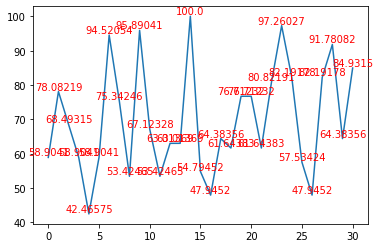

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '바람막이', 'keywords': ['바람막이'], 'data': [{'period': '2021-03-01', 'ratio': 66.66666}, {'period': '2021-03-02', 'ratio': 55.55555}, {'period': '2021-03-03', 'ratio': 36.11111}, {'period': '2021-03-04', 'ratio': 25.92592}, {'period': '2021-03-05', 'ratio': 35.18518}, {'period': '2021-03-06', 'ratio': 50}, {'period': '2021-03-07', 'ratio': 51.85185}, {'period': '2021-03-08', 'ratio': 62.03703}, {'period': '2021-03-09', 'ratio': 40.74074}, {'period': '2021-03-10', 'ratio': 57.4074}, {'period': '2021-03-11', 'ratio': 57.4074}, {'period': '2021-03-12', 'ratio': 59.25925}, {'period': '2021-03-13', 'ratio': 77.77777}, {'period': '2021-03-14', 'ratio': 65.74074}, {'period': '2021-03-15', 'ratio': 65.74074}, {'period': '2021-03-16', 'ratio': 92.59259}, {'period': '2021-03-17', 'ratio': 54.62962}, {'period': '2021-03-18', 'ratio': 70.37037}, {'period': '2021-03-19', 'ratio': 90.74074}, {'period': '2021-03

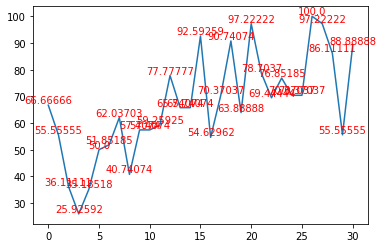

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '트렌치코트', 'keywords': ['트렌치코트'], 'data': [{'period': '2021-03-01', 'ratio': 59.25925}, {'period': '2021-03-02', 'ratio': 61.11111}, {'period': '2021-03-03', 'ratio': 58.33333}, {'period': '2021-03-04', 'ratio': 44.44444}, {'period': '2021-03-05', 'ratio': 55.55555}, {'period': '2021-03-06', 'ratio': 71.29629}, {'period': '2021-03-07', 'ratio': 62.96296}, {'period': '2021-03-08', 'ratio': 48.14814}, {'period': '2021-03-09', 'ratio': 86.11111}, {'period': '2021-03-10', 'ratio': 75}, {'period': '2021-03-11', 'ratio': 100}, {'period': '2021-03-12', 'ratio': 87.03703}, {'period': '2021-03-13', 'ratio': 61.11111}, {'period': '2021-03-14', 'ratio': 78.7037}, {'period': '2021-03-15', 'ratio': 75.92592}, {'period': '2021-03-16', 'ratio': 74.07407}, {'period': '2021-03-17', 'ratio': 63.88888}, {'period': '2021-03-18', 'ratio': 50}, {'period': '2021-03-19', 'ratio': 52.77777}, {'period': '2021-03-20', 'r

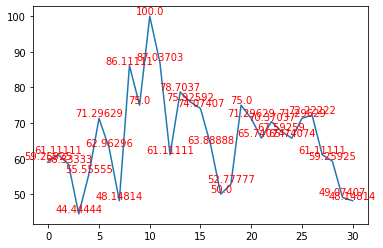

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '원피스', 'keywords': ['원피스'], 'data': [{'period': '2021-03-01', 'ratio': 75.46583}, {'period': '2021-03-02', 'ratio': 50.93167}, {'period': '2021-03-03', 'ratio': 51.24223}, {'period': '2021-03-04', 'ratio': 62.73291}, {'period': '2021-03-05', 'ratio': 58.07453}, {'period': '2021-03-06', 'ratio': 72.98136}, {'period': '2021-03-07', 'ratio': 78.26086}, {'period': '2021-03-08', 'ratio': 75.46583}, {'period': '2021-03-09', 'ratio': 66.45962}, {'period': '2021-03-10', 'ratio': 77.32919}, {'period': '2021-03-11', 'ratio': 69.56521}, {'period': '2021-03-12', 'ratio': 70.49689}, {'period': '2021-03-13', 'ratio': 61.49068}, {'period': '2021-03-14', 'ratio': 65.21739}, {'period': '2021-03-15', 'ratio': 59.00621}, {'period': '2021-03-16', 'ratio': 71.42857}, {'period': '2021-03-17', 'ratio': 77.32919}, {'period': '2021-03-18', 'ratio': 80.12422}, {'period': '2021-03-19', 'ratio': 68.63354}, {'period': '2

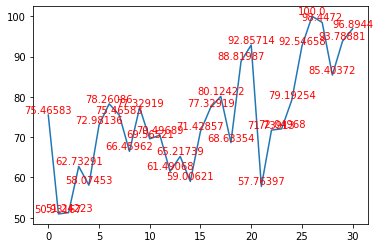

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '트위드자켓', 'keywords': ['트위드자켓'], 'data': [{'period': '2021-03-01', 'ratio': 79.7619}, {'period': '2021-03-02', 'ratio': 48.21428}, {'period': '2021-03-03', 'ratio': 66.07142}, {'period': '2021-03-04', 'ratio': 60.71428}, {'period': '2021-03-05', 'ratio': 60.11904}, {'period': '2021-03-06', 'ratio': 57.73809}, {'period': '2021-03-07', 'ratio': 64.28571}, {'period': '2021-03-08', 'ratio': 64.28571}, {'period': '2021-03-09', 'ratio': 62.5}, {'period': '2021-03-10', 'ratio': 89.28571}, {'period': '2021-03-11', 'ratio': 85.71428}, {'period': '2021-03-12', 'ratio': 79.7619}, {'period': '2021-03-13', 'ratio': 100}, {'period': '2021-03-14', 'ratio': 73.21428}, {'period': '2021-03-15', 'ratio': 66.66666}, {'period': '2021-03-16', 'ratio': 58.92857}, {'period': '2021-03-17', 'ratio': 70.23809}, {'period': '2021-03-18', 'ratio': 64.88095}, {'period': '2021-03-19', 'ratio': 73.21428}, {'period': '2021-03-

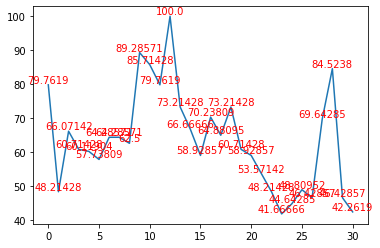

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '후드집업', 'keywords': ['후드집업'], 'data': [{'period': '2021-03-01', 'ratio': 94.11764}, {'period': '2021-03-02', 'ratio': 75.29411}, {'period': '2021-03-03', 'ratio': 61.17647}, {'period': '2021-03-04', 'ratio': 98.82352}, {'period': '2021-03-05', 'ratio': 63.52941}, {'period': '2021-03-06', 'ratio': 56.47058}, {'period': '2021-03-07', 'ratio': 96.47058}, {'period': '2021-03-08', 'ratio': 80}, {'period': '2021-03-09', 'ratio': 63.52941}, {'period': '2021-03-10', 'ratio': 87.05882}, {'period': '2021-03-11', 'ratio': 100}, {'period': '2021-03-12', 'ratio': 96.47058}, {'period': '2021-03-13', 'ratio': 76.47058}, {'period': '2021-03-14', 'ratio': 76.47058}, {'period': '2021-03-15', 'ratio': 63.52941}, {'period': '2021-03-16', 'ratio': 81.17647}, {'period': '2021-03-17', 'ratio': 77.64705}, {'period': '2021-03-18', 'ratio': 85.88235}, {'period': '2021-03-19', 'ratio': 69.41176}, {'period': '2021-03-20

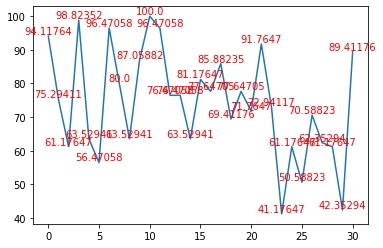

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '나이키맨투맨', 'keywords': ['나이키맨투맨'], 'data': [{'period': '2021-03-01', 'ratio': 66.66666}, {'period': '2021-03-02', 'ratio': 61.11111}, {'period': '2021-03-03', 'ratio': 50}, {'period': '2021-03-04', 'ratio': 57.4074}, {'period': '2021-03-05', 'ratio': 33.33333}, {'period': '2021-03-06', 'ratio': 66.66666}, {'period': '2021-03-07', 'ratio': 100}, {'period': '2021-03-08', 'ratio': 62.96296}, {'period': '2021-03-09', 'ratio': 61.11111}, {'period': '2021-03-10', 'ratio': 50}, {'period': '2021-03-11', 'ratio': 70.37037}, {'period': '2021-03-12', 'ratio': 33.33333}, {'period': '2021-03-13', 'ratio': 35.18518}, {'period': '2021-03-14', 'ratio': 55.55555}, {'period': '2021-03-15', 'ratio': 59.25925}, {'period': '2021-03-16', 'ratio': 61.11111}, {'period': '2021-03-17', 'ratio': 85.18518}, {'period': '2021-03-18', 'ratio': 81.48148}, {'period': '2021-03-19', 'ratio': 77.77777}, {'period': '2021-03-20', 

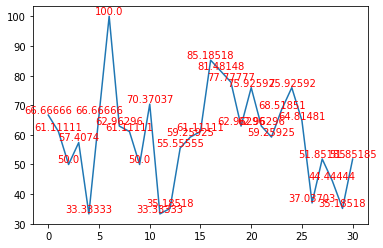

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '나이키후드집업', 'keywords': ['나이키후드집업'], 'data': [{'period': '2021-03-01', 'ratio': 35.18518}, {'period': '2021-03-02', 'ratio': 22.22222}, {'period': '2021-03-03', 'ratio': 31.48148}, {'period': '2021-03-04', 'ratio': 35.18518}, {'period': '2021-03-05', 'ratio': 66.66666}, {'period': '2021-03-06', 'ratio': 37.03703}, {'period': '2021-03-07', 'ratio': 85.18518}, {'period': '2021-03-08', 'ratio': 57.4074}, {'period': '2021-03-09', 'ratio': 38.88888}, {'period': '2021-03-10', 'ratio': 50}, {'period': '2021-03-11', 'ratio': 31.48148}, {'period': '2021-03-12', 'ratio': 29.62962}, {'period': '2021-03-13', 'ratio': 46.29629}, {'period': '2021-03-14', 'ratio': 68.51851}, {'period': '2021-03-15', 'ratio': 22.22222}, {'period': '2021-03-16', 'ratio': 35.18518}, {'period': '2021-03-17', 'ratio': 50}, {'period': '2021-03-18', 'ratio': 83.33333}, {'period': '2021-03-19', 'ratio': 72.22222}, {'period': '2021-0

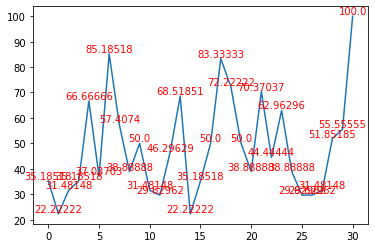

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '폴로가디건', 'keywords': ['폴로가디건'], 'data': [{'period': '2021-03-01', 'ratio': 57.6923}, {'period': '2021-03-02', 'ratio': 84.61538}, {'period': '2021-03-03', 'ratio': 34.61538}, {'period': '2021-03-04', 'ratio': 30.76923}, {'period': '2021-03-05', 'ratio': 30.76923}, {'period': '2021-03-06', 'ratio': 53.84615}, {'period': '2021-03-07', 'ratio': 53.84615}, {'period': '2021-03-08', 'ratio': 26.92307}, {'period': '2021-03-09', 'ratio': 42.30769}, {'period': '2021-03-10', 'ratio': 34.61538}, {'period': '2021-03-11', 'ratio': 30.76923}, {'period': '2021-03-12', 'ratio': 57.6923}, {'period': '2021-03-13', 'ratio': 46.15384}, {'period': '2021-03-14', 'ratio': 42.30769}, {'period': '2021-03-15', 'ratio': 50}, {'period': '2021-03-16', 'ratio': 42.30769}, {'period': '2021-03-17', 'ratio': 50}, {'period': '2021-03-18', 'ratio': 88.46153}, {'period': '2021-03-19', 'ratio': 34.61538}, {'period': '2021-03-20'

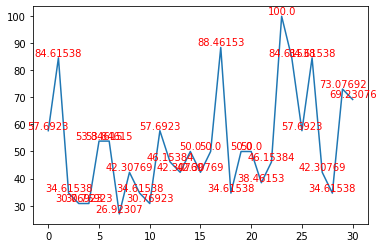

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '잠옷', 'keywords': ['잠옷'], 'data': [{'period': '2021-03-01', 'ratio': 69.56521}, {'period': '2021-03-02', 'ratio': 77.3913}, {'period': '2021-03-03', 'ratio': 43.47826}, {'period': '2021-03-04', 'ratio': 69.56521}, {'period': '2021-03-05', 'ratio': 31.30434}, {'period': '2021-03-06', 'ratio': 73.04347}, {'period': '2021-03-07', 'ratio': 65.21739}, {'period': '2021-03-08', 'ratio': 68.69565}, {'period': '2021-03-09', 'ratio': 31.30434}, {'period': '2021-03-10', 'ratio': 50.43478}, {'period': '2021-03-11', 'ratio': 48.69565}, {'period': '2021-03-12', 'ratio': 69.56521}, {'period': '2021-03-13', 'ratio': 61.73913}, {'period': '2021-03-14', 'ratio': 85.21739}, {'period': '2021-03-15', 'ratio': 60.86956}, {'period': '2021-03-16', 'ratio': 66.95652}, {'period': '2021-03-17', 'ratio': 46.08695}, {'period': '2021-03-18', 'ratio': 60.86956}, {'period': '2021-03-19', 'ratio': 70.43478}, {'period': '2021

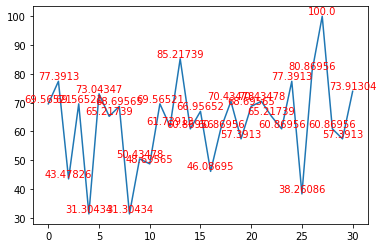

In [25]:
find_top10_ratio('1')

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '나이키바람막이', 'keywords': ['나이키바람막이'], 'data': [{'period': '2021-03-01', 'ratio': 58.9041}, {'period': '2021-03-02', 'ratio': 78.08219}, {'period': '2021-03-03', 'ratio': 68.49315}, {'period': '2021-03-04', 'ratio': 58.9041}, {'period': '2021-03-05', 'ratio': 42.46575}, {'period': '2021-03-06', 'ratio': 58.9041}, {'period': '2021-03-07', 'ratio': 94.52054}, {'period': '2021-03-08', 'ratio': 75.34246}, {'period': '2021-03-09', 'ratio': 53.42465}, {'period': '2021-03-10', 'ratio': 95.89041}, {'period': '2021-03-11', 'ratio': 67.12328}, {'period': '2021-03-12', 'ratio': 53.42465}, {'period': '2021-03-13', 'ratio': 63.01369}, {'period': '2021-03-14', 'ratio': 63.01369}, {'period': '2021-03-15', 'ratio': 100}, {'period': '2021-03-16', 'ratio': 54.79452}, {'period': '2021-03-17', 'ratio': 47.9452}, {'period': '2021-03-18', 'ratio': 64.38356}, {'period': '2021-03-19', 'ratio': 61.64383}, {'period': '20

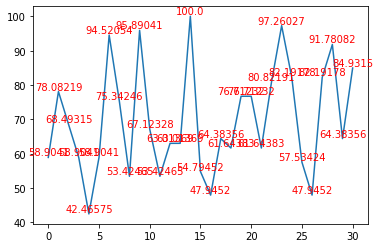

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '바람막이', 'keywords': ['바람막이'], 'data': [{'period': '2021-03-01', 'ratio': 66.66666}, {'period': '2021-03-02', 'ratio': 55.55555}, {'period': '2021-03-03', 'ratio': 36.11111}, {'period': '2021-03-04', 'ratio': 25.92592}, {'period': '2021-03-05', 'ratio': 35.18518}, {'period': '2021-03-06', 'ratio': 50}, {'period': '2021-03-07', 'ratio': 51.85185}, {'period': '2021-03-08', 'ratio': 62.03703}, {'period': '2021-03-09', 'ratio': 40.74074}, {'period': '2021-03-10', 'ratio': 57.4074}, {'period': '2021-03-11', 'ratio': 57.4074}, {'period': '2021-03-12', 'ratio': 59.25925}, {'period': '2021-03-13', 'ratio': 77.77777}, {'period': '2021-03-14', 'ratio': 65.74074}, {'period': '2021-03-15', 'ratio': 65.74074}, {'period': '2021-03-16', 'ratio': 92.59259}, {'period': '2021-03-17', 'ratio': 54.62962}, {'period': '2021-03-18', 'ratio': 70.37037}, {'period': '2021-03-19', 'ratio': 90.74074}, {'period': '2021-03

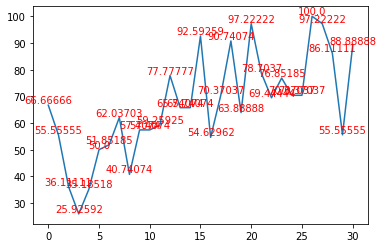

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '트렌치코트', 'keywords': ['트렌치코트'], 'data': [{'period': '2021-03-01', 'ratio': 59.25925}, {'period': '2021-03-02', 'ratio': 61.11111}, {'period': '2021-03-03', 'ratio': 58.33333}, {'period': '2021-03-04', 'ratio': 44.44444}, {'period': '2021-03-05', 'ratio': 55.55555}, {'period': '2021-03-06', 'ratio': 71.29629}, {'period': '2021-03-07', 'ratio': 62.96296}, {'period': '2021-03-08', 'ratio': 48.14814}, {'period': '2021-03-09', 'ratio': 86.11111}, {'period': '2021-03-10', 'ratio': 75}, {'period': '2021-03-11', 'ratio': 100}, {'period': '2021-03-12', 'ratio': 87.03703}, {'period': '2021-03-13', 'ratio': 61.11111}, {'period': '2021-03-14', 'ratio': 78.7037}, {'period': '2021-03-15', 'ratio': 75.92592}, {'period': '2021-03-16', 'ratio': 74.07407}, {'period': '2021-03-17', 'ratio': 63.88888}, {'period': '2021-03-18', 'ratio': 50}, {'period': '2021-03-19', 'ratio': 52.77777}, {'period': '2021-03-20', 'r

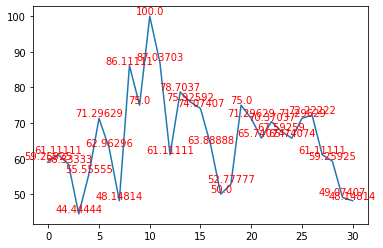

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '원피스', 'keywords': ['원피스'], 'data': [{'period': '2021-03-01', 'ratio': 75.46583}, {'period': '2021-03-02', 'ratio': 50.93167}, {'period': '2021-03-03', 'ratio': 51.24223}, {'period': '2021-03-04', 'ratio': 62.73291}, {'period': '2021-03-05', 'ratio': 58.07453}, {'period': '2021-03-06', 'ratio': 72.98136}, {'period': '2021-03-07', 'ratio': 78.26086}, {'period': '2021-03-08', 'ratio': 75.46583}, {'period': '2021-03-09', 'ratio': 66.45962}, {'period': '2021-03-10', 'ratio': 77.32919}, {'period': '2021-03-11', 'ratio': 69.56521}, {'period': '2021-03-12', 'ratio': 70.49689}, {'period': '2021-03-13', 'ratio': 61.49068}, {'period': '2021-03-14', 'ratio': 65.21739}, {'period': '2021-03-15', 'ratio': 59.00621}, {'period': '2021-03-16', 'ratio': 71.42857}, {'period': '2021-03-17', 'ratio': 77.32919}, {'period': '2021-03-18', 'ratio': 80.12422}, {'period': '2021-03-19', 'ratio': 68.63354}, {'period': '2

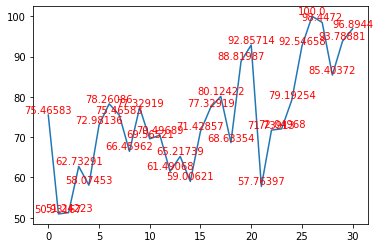

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '트위드자켓', 'keywords': ['트위드자켓'], 'data': [{'period': '2021-03-01', 'ratio': 79.7619}, {'period': '2021-03-02', 'ratio': 48.21428}, {'period': '2021-03-03', 'ratio': 66.07142}, {'period': '2021-03-04', 'ratio': 60.71428}, {'period': '2021-03-05', 'ratio': 60.11904}, {'period': '2021-03-06', 'ratio': 57.73809}, {'period': '2021-03-07', 'ratio': 64.28571}, {'period': '2021-03-08', 'ratio': 64.28571}, {'period': '2021-03-09', 'ratio': 62.5}, {'period': '2021-03-10', 'ratio': 89.28571}, {'period': '2021-03-11', 'ratio': 85.71428}, {'period': '2021-03-12', 'ratio': 79.7619}, {'period': '2021-03-13', 'ratio': 100}, {'period': '2021-03-14', 'ratio': 73.21428}, {'period': '2021-03-15', 'ratio': 66.66666}, {'period': '2021-03-16', 'ratio': 58.92857}, {'period': '2021-03-17', 'ratio': 70.23809}, {'period': '2021-03-18', 'ratio': 64.88095}, {'period': '2021-03-19', 'ratio': 73.21428}, {'period': '2021-03-

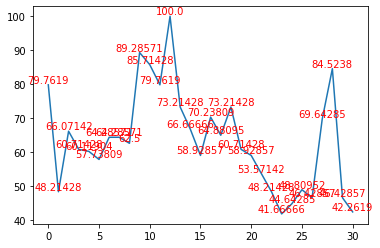

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '후드집업', 'keywords': ['후드집업'], 'data': [{'period': '2021-03-01', 'ratio': 94.11764}, {'period': '2021-03-02', 'ratio': 75.29411}, {'period': '2021-03-03', 'ratio': 61.17647}, {'period': '2021-03-04', 'ratio': 98.82352}, {'period': '2021-03-05', 'ratio': 63.52941}, {'period': '2021-03-06', 'ratio': 56.47058}, {'period': '2021-03-07', 'ratio': 96.47058}, {'period': '2021-03-08', 'ratio': 80}, {'period': '2021-03-09', 'ratio': 63.52941}, {'period': '2021-03-10', 'ratio': 87.05882}, {'period': '2021-03-11', 'ratio': 100}, {'period': '2021-03-12', 'ratio': 96.47058}, {'period': '2021-03-13', 'ratio': 76.47058}, {'period': '2021-03-14', 'ratio': 76.47058}, {'period': '2021-03-15', 'ratio': 63.52941}, {'period': '2021-03-16', 'ratio': 81.17647}, {'period': '2021-03-17', 'ratio': 77.64705}, {'period': '2021-03-18', 'ratio': 85.88235}, {'period': '2021-03-19', 'ratio': 69.41176}, {'period': '2021-03-20

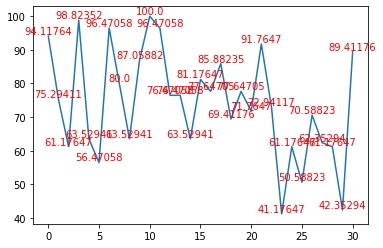

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '나이키맨투맨', 'keywords': ['나이키맨투맨'], 'data': [{'period': '2021-03-01', 'ratio': 66.66666}, {'period': '2021-03-02', 'ratio': 61.11111}, {'period': '2021-03-03', 'ratio': 50}, {'period': '2021-03-04', 'ratio': 57.4074}, {'period': '2021-03-05', 'ratio': 33.33333}, {'period': '2021-03-06', 'ratio': 66.66666}, {'period': '2021-03-07', 'ratio': 100}, {'period': '2021-03-08', 'ratio': 62.96296}, {'period': '2021-03-09', 'ratio': 61.11111}, {'period': '2021-03-10', 'ratio': 50}, {'period': '2021-03-11', 'ratio': 70.37037}, {'period': '2021-03-12', 'ratio': 33.33333}, {'period': '2021-03-13', 'ratio': 35.18518}, {'period': '2021-03-14', 'ratio': 55.55555}, {'period': '2021-03-15', 'ratio': 59.25925}, {'period': '2021-03-16', 'ratio': 61.11111}, {'period': '2021-03-17', 'ratio': 85.18518}, {'period': '2021-03-18', 'ratio': 81.48148}, {'period': '2021-03-19', 'ratio': 77.77777}, {'period': '2021-03-20', 

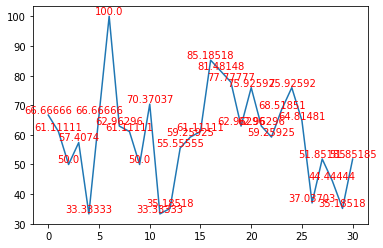

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '나이키후드집업', 'keywords': ['나이키후드집업'], 'data': [{'period': '2021-03-01', 'ratio': 35.18518}, {'period': '2021-03-02', 'ratio': 22.22222}, {'period': '2021-03-03', 'ratio': 31.48148}, {'period': '2021-03-04', 'ratio': 35.18518}, {'period': '2021-03-05', 'ratio': 66.66666}, {'period': '2021-03-06', 'ratio': 37.03703}, {'period': '2021-03-07', 'ratio': 85.18518}, {'period': '2021-03-08', 'ratio': 57.4074}, {'period': '2021-03-09', 'ratio': 38.88888}, {'period': '2021-03-10', 'ratio': 50}, {'period': '2021-03-11', 'ratio': 31.48148}, {'period': '2021-03-12', 'ratio': 29.62962}, {'period': '2021-03-13', 'ratio': 46.29629}, {'period': '2021-03-14', 'ratio': 68.51851}, {'period': '2021-03-15', 'ratio': 22.22222}, {'period': '2021-03-16', 'ratio': 35.18518}, {'period': '2021-03-17', 'ratio': 50}, {'period': '2021-03-18', 'ratio': 83.33333}, {'period': '2021-03-19', 'ratio': 72.22222}, {'period': '2021-0

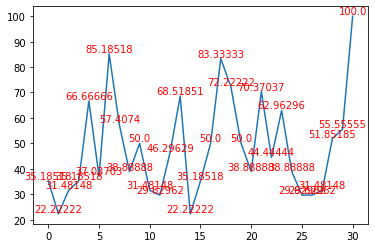

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '폴로가디건', 'keywords': ['폴로가디건'], 'data': [{'period': '2021-03-01', 'ratio': 57.6923}, {'period': '2021-03-02', 'ratio': 84.61538}, {'period': '2021-03-03', 'ratio': 34.61538}, {'period': '2021-03-04', 'ratio': 30.76923}, {'period': '2021-03-05', 'ratio': 30.76923}, {'period': '2021-03-06', 'ratio': 53.84615}, {'period': '2021-03-07', 'ratio': 53.84615}, {'period': '2021-03-08', 'ratio': 26.92307}, {'period': '2021-03-09', 'ratio': 42.30769}, {'period': '2021-03-10', 'ratio': 34.61538}, {'period': '2021-03-11', 'ratio': 30.76923}, {'period': '2021-03-12', 'ratio': 57.6923}, {'period': '2021-03-13', 'ratio': 46.15384}, {'period': '2021-03-14', 'ratio': 42.30769}, {'period': '2021-03-15', 'ratio': 50}, {'period': '2021-03-16', 'ratio': 42.30769}, {'period': '2021-03-17', 'ratio': 50}, {'period': '2021-03-18', 'ratio': 88.46153}, {'period': '2021-03-19', 'ratio': 34.61538}, {'period': '2021-03-20'

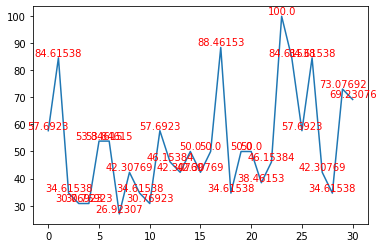

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '잠옷', 'keywords': ['잠옷'], 'data': [{'period': '2021-03-01', 'ratio': 69.56521}, {'period': '2021-03-02', 'ratio': 77.3913}, {'period': '2021-03-03', 'ratio': 43.47826}, {'period': '2021-03-04', 'ratio': 69.56521}, {'period': '2021-03-05', 'ratio': 31.30434}, {'period': '2021-03-06', 'ratio': 73.04347}, {'period': '2021-03-07', 'ratio': 65.21739}, {'period': '2021-03-08', 'ratio': 68.69565}, {'period': '2021-03-09', 'ratio': 31.30434}, {'period': '2021-03-10', 'ratio': 50.43478}, {'period': '2021-03-11', 'ratio': 48.69565}, {'period': '2021-03-12', 'ratio': 69.56521}, {'period': '2021-03-13', 'ratio': 61.73913}, {'period': '2021-03-14', 'ratio': 85.21739}, {'period': '2021-03-15', 'ratio': 60.86956}, {'period': '2021-03-16', 'ratio': 66.95652}, {'period': '2021-03-17', 'ratio': 46.08695}, {'period': '2021-03-18', 'ratio': 60.86956}, {'period': '2021-03-19', 'ratio': 70.43478}, {'period': '2021

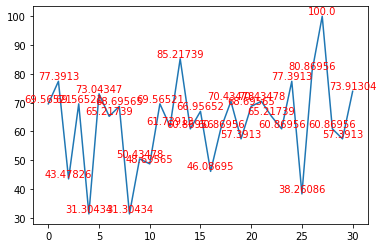

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '원피스', 'keywords': ['원피스'], 'data': [{'period': '2021-03-01', 'ratio': 75.46583}, {'period': '2021-03-02', 'ratio': 50.93167}, {'period': '2021-03-03', 'ratio': 51.24223}, {'period': '2021-03-04', 'ratio': 62.73291}, {'period': '2021-03-05', 'ratio': 58.07453}, {'period': '2021-03-06', 'ratio': 72.98136}, {'period': '2021-03-07', 'ratio': 78.26086}, {'period': '2021-03-08', 'ratio': 75.46583}, {'period': '2021-03-09', 'ratio': 66.45962}, {'period': '2021-03-10', 'ratio': 77.32919}, {'period': '2021-03-11', 'ratio': 69.56521}, {'period': '2021-03-12', 'ratio': 70.49689}, {'period': '2021-03-13', 'ratio': 61.49068}, {'period': '2021-03-14', 'ratio': 65.21739}, {'period': '2021-03-15', 'ratio': 59.00621}, {'period': '2021-03-16', 'ratio': 71.42857}, {'period': '2021-03-17', 'ratio': 77.32919}, {'period': '2021-03-18', 'ratio': 80.12422}, {'period': '2021-03-19', 'ratio': 68.63354}, {'period': '2

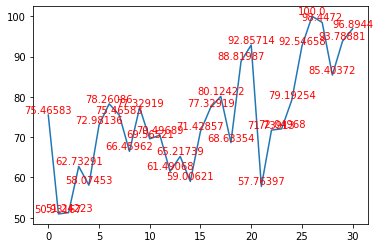

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '트위드자켓', 'keywords': ['트위드자켓'], 'data': [{'period': '2021-03-01', 'ratio': 79.7619}, {'period': '2021-03-02', 'ratio': 48.21428}, {'period': '2021-03-03', 'ratio': 66.07142}, {'period': '2021-03-04', 'ratio': 60.71428}, {'period': '2021-03-05', 'ratio': 60.11904}, {'period': '2021-03-06', 'ratio': 57.73809}, {'period': '2021-03-07', 'ratio': 64.28571}, {'period': '2021-03-08', 'ratio': 64.28571}, {'period': '2021-03-09', 'ratio': 62.5}, {'period': '2021-03-10', 'ratio': 89.28571}, {'period': '2021-03-11', 'ratio': 85.71428}, {'period': '2021-03-12', 'ratio': 79.7619}, {'period': '2021-03-13', 'ratio': 100}, {'period': '2021-03-14', 'ratio': 73.21428}, {'period': '2021-03-15', 'ratio': 66.66666}, {'period': '2021-03-16', 'ratio': 58.92857}, {'period': '2021-03-17', 'ratio': 70.23809}, {'period': '2021-03-18', 'ratio': 64.88095}, {'period': '2021-03-19', 'ratio': 73.21428}, {'period': '2021-03-

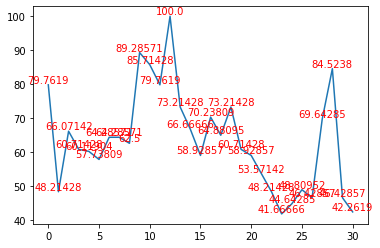

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '트렌치코트', 'keywords': ['트렌치코트'], 'data': [{'period': '2021-03-01', 'ratio': 59.25925}, {'period': '2021-03-02', 'ratio': 61.11111}, {'period': '2021-03-03', 'ratio': 58.33333}, {'period': '2021-03-04', 'ratio': 44.44444}, {'period': '2021-03-05', 'ratio': 55.55555}, {'period': '2021-03-06', 'ratio': 71.29629}, {'period': '2021-03-07', 'ratio': 62.96296}, {'period': '2021-03-08', 'ratio': 48.14814}, {'period': '2021-03-09', 'ratio': 86.11111}, {'period': '2021-03-10', 'ratio': 75}, {'period': '2021-03-11', 'ratio': 100}, {'period': '2021-03-12', 'ratio': 87.03703}, {'period': '2021-03-13', 'ratio': 61.11111}, {'period': '2021-03-14', 'ratio': 78.7037}, {'period': '2021-03-15', 'ratio': 75.92592}, {'period': '2021-03-16', 'ratio': 74.07407}, {'period': '2021-03-17', 'ratio': 63.88888}, {'period': '2021-03-18', 'ratio': 50}, {'period': '2021-03-19', 'ratio': 52.77777}, {'period': '2021-03-20', 'r

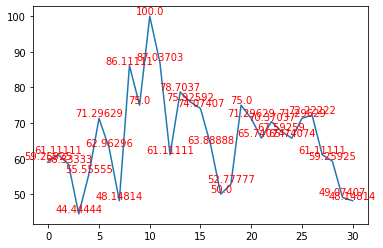

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '블라우스', 'keywords': ['블라우스'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 58.21917}, {'period': '2021-03-03', 'ratio': 44.52054}, {'period': '2021-03-04', 'ratio': 34.9315}, {'period': '2021-03-05', 'ratio': 50.68493}, {'period': '2021-03-06', 'ratio': 43.83561}, {'period': '2021-03-07', 'ratio': 82.19178}, {'period': '2021-03-08', 'ratio': 77.39726}, {'period': '2021-03-09', 'ratio': 60.9589}, {'period': '2021-03-10', 'ratio': 74.65753}, {'period': '2021-03-11', 'ratio': 64.38356}, {'period': '2021-03-12', 'ratio': 47.9452}, {'period': '2021-03-13', 'ratio': 45.20547}, {'period': '2021-03-14', 'ratio': 68.49315}, {'period': '2021-03-15', 'ratio': 53.42465}, {'period': '2021-03-16', 'ratio': 56.84931}, {'period': '2021-03-17', 'ratio': 53.42465}, {'period': '2021-03-18', 'ratio': 51.36986}, {'period': '2021-03-19', 'ratio': 64.38356}, {'period': '2021-03

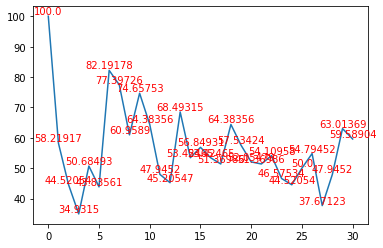

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '롱원피스', 'keywords': ['롱원피스'], 'data': [{'period': '2021-03-01', 'ratio': 62.5}, {'period': '2021-03-02', 'ratio': 49.10714}, {'period': '2021-03-03', 'ratio': 41.07142}, {'period': '2021-03-04', 'ratio': 41.96428}, {'period': '2021-03-05', 'ratio': 32.14285}, {'period': '2021-03-06', 'ratio': 78.57142}, {'period': '2021-03-07', 'ratio': 80.35714}, {'period': '2021-03-08', 'ratio': 71.42857}, {'period': '2021-03-09', 'ratio': 75}, {'period': '2021-03-10', 'ratio': 66.07142}, {'period': '2021-03-11', 'ratio': 66.96428}, {'period': '2021-03-12', 'ratio': 84.82142}, {'period': '2021-03-13', 'ratio': 84.82142}, {'period': '2021-03-14', 'ratio': 53.57142}, {'period': '2021-03-15', 'ratio': 70.53571}, {'period': '2021-03-16', 'ratio': 81.25}, {'period': '2021-03-17', 'ratio': 94.64285}, {'period': '2021-03-18', 'ratio': 83.92857}, {'period': '2021-03-19', 'ratio': 88.39285}, {'period': '2021-03-20',

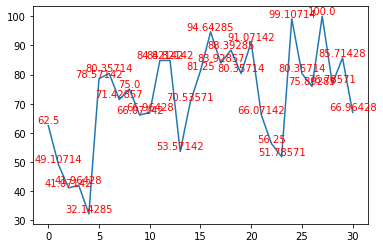

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '나이키바람막이', 'keywords': ['나이키바람막이'], 'data': [{'period': '2021-03-01', 'ratio': 58.9041}, {'period': '2021-03-02', 'ratio': 78.08219}, {'period': '2021-03-03', 'ratio': 68.49315}, {'period': '2021-03-04', 'ratio': 58.9041}, {'period': '2021-03-05', 'ratio': 42.46575}, {'period': '2021-03-06', 'ratio': 58.9041}, {'period': '2021-03-07', 'ratio': 94.52054}, {'period': '2021-03-08', 'ratio': 75.34246}, {'period': '2021-03-09', 'ratio': 53.42465}, {'period': '2021-03-10', 'ratio': 95.89041}, {'period': '2021-03-11', 'ratio': 67.12328}, {'period': '2021-03-12', 'ratio': 53.42465}, {'period': '2021-03-13', 'ratio': 63.01369}, {'period': '2021-03-14', 'ratio': 63.01369}, {'period': '2021-03-15', 'ratio': 100}, {'period': '2021-03-16', 'ratio': 54.79452}, {'period': '2021-03-17', 'ratio': 47.9452}, {'period': '2021-03-18', 'ratio': 64.38356}, {'period': '2021-03-19', 'ratio': 61.64383}, {'period': '20

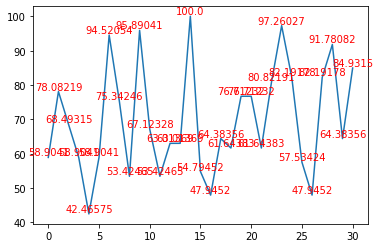

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '여자트렌치코트', 'keywords': ['여자트렌치코트'], 'data': [{'period': '2021-03-01', 'ratio': 72.09302}, {'period': '2021-03-02', 'ratio': 20.15503}, {'period': '2021-03-03', 'ratio': 37.2093}, {'period': '2021-03-04', 'ratio': 30.23255}, {'period': '2021-03-05', 'ratio': 29.45736}, {'period': '2021-03-06', 'ratio': 56.58914}, {'period': '2021-03-07', 'ratio': 53.48837}, {'period': '2021-03-08', 'ratio': 55.81395}, {'period': '2021-03-09', 'ratio': 62.79069}, {'period': '2021-03-10', 'ratio': 92.24806}, {'period': '2021-03-11', 'ratio': 71.31782}, {'period': '2021-03-12', 'ratio': 59.68992}, {'period': '2021-03-13', 'ratio': 70.54263}, {'period': '2021-03-14', 'ratio': 100}, {'period': '2021-03-15', 'ratio': 71.31782}, {'period': '2021-03-16', 'ratio': 44.18604}, {'period': '2021-03-17', 'ratio': 62.0155}, {'period': '2021-03-18', 'ratio': 63.56589}, {'period': '2021-03-19', 'ratio': 65.11627}, {'period': '

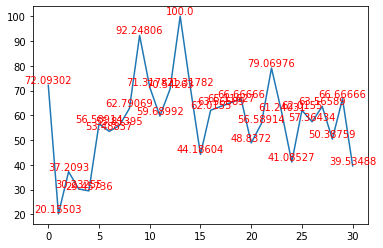

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '여성트레이닝세트', 'keywords': ['여성트레이닝세트'], 'data': [{'period': '2021-03-01', 'ratio': 89.92248}, {'period': '2021-03-02', 'ratio': 62.79069}, {'period': '2021-03-03', 'ratio': 54.26356}, {'period': '2021-03-04', 'ratio': 62.0155}, {'period': '2021-03-05', 'ratio': 77.51937}, {'period': '2021-03-06', 'ratio': 88.37209}, {'period': '2021-03-07', 'ratio': 68.99224}, {'period': '2021-03-08', 'ratio': 79.06976}, {'period': '2021-03-09', 'ratio': 83.72093}, {'period': '2021-03-10', 'ratio': 51.93798}, {'period': '2021-03-11', 'ratio': 49.6124}, {'period': '2021-03-12', 'ratio': 53.48837}, {'period': '2021-03-13', 'ratio': 64.34108}, {'period': '2021-03-14', 'ratio': 65.11627}, {'period': '2021-03-15', 'ratio': 90.69767}, {'period': '2021-03-16', 'ratio': 61.24031}, {'period': '2021-03-17', 'ratio': 62.0155}, {'period': '2021-03-18', 'ratio': 75.96899}, {'period': '2021-03-19', 'ratio': 67.44186}, {'peri

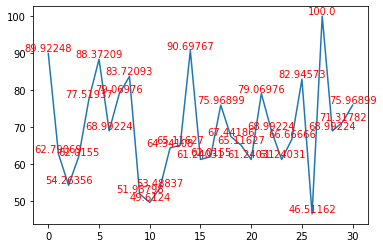

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '여성가디건', 'keywords': ['여성가디건'], 'data': [{'period': '2021-03-01', 'ratio': 91.21621}, {'period': '2021-03-02', 'ratio': 71.62162}, {'period': '2021-03-03', 'ratio': 82.43243}, {'period': '2021-03-04', 'ratio': 71.62162}, {'period': '2021-03-05', 'ratio': 56.75675}, {'period': '2021-03-06', 'ratio': 77.7027}, {'period': '2021-03-07', 'ratio': 79.72972}, {'period': '2021-03-08', 'ratio': 87.16216}, {'period': '2021-03-09', 'ratio': 77.02702}, {'period': '2021-03-10', 'ratio': 81.08108}, {'period': '2021-03-11', 'ratio': 72.29729}, {'period': '2021-03-12', 'ratio': 68.91891}, {'period': '2021-03-13', 'ratio': 77.7027}, {'period': '2021-03-14', 'ratio': 94.59459}, {'period': '2021-03-15', 'ratio': 88.51351}, {'period': '2021-03-16', 'ratio': 81.08108}, {'period': '2021-03-17', 'ratio': 66.21621}, {'period': '2021-03-18', 'ratio': 86.48648}, {'period': '2021-03-19', 'ratio': 66.89189}, {'period': 

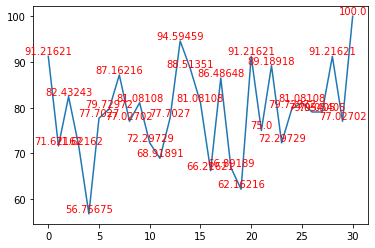

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '바람막이', 'keywords': ['바람막이'], 'data': [{'period': '2021-03-01', 'ratio': 66.66666}, {'period': '2021-03-02', 'ratio': 55.55555}, {'period': '2021-03-03', 'ratio': 36.11111}, {'period': '2021-03-04', 'ratio': 25.92592}, {'period': '2021-03-05', 'ratio': 35.18518}, {'period': '2021-03-06', 'ratio': 50}, {'period': '2021-03-07', 'ratio': 51.85185}, {'period': '2021-03-08', 'ratio': 62.03703}, {'period': '2021-03-09', 'ratio': 40.74074}, {'period': '2021-03-10', 'ratio': 57.4074}, {'period': '2021-03-11', 'ratio': 57.4074}, {'period': '2021-03-12', 'ratio': 59.25925}, {'period': '2021-03-13', 'ratio': 77.77777}, {'period': '2021-03-14', 'ratio': 65.74074}, {'period': '2021-03-15', 'ratio': 65.74074}, {'period': '2021-03-16', 'ratio': 92.59259}, {'period': '2021-03-17', 'ratio': 54.62962}, {'period': '2021-03-18', 'ratio': 70.37037}, {'period': '2021-03-19', 'ratio': 90.74074}, {'period': '2021-03

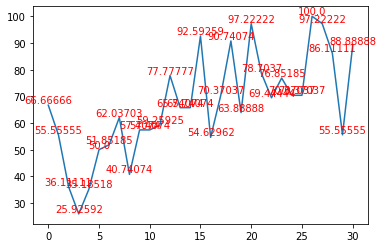

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '원피스', 'keywords': ['원피스'], 'data': [{'period': '2021-03-01', 'ratio': 75.46583}, {'period': '2021-03-02', 'ratio': 50.93167}, {'period': '2021-03-03', 'ratio': 51.24223}, {'period': '2021-03-04', 'ratio': 62.73291}, {'period': '2021-03-05', 'ratio': 58.07453}, {'period': '2021-03-06', 'ratio': 72.98136}, {'period': '2021-03-07', 'ratio': 78.26086}, {'period': '2021-03-08', 'ratio': 75.46583}, {'period': '2021-03-09', 'ratio': 66.45962}, {'period': '2021-03-10', 'ratio': 77.32919}, {'period': '2021-03-11', 'ratio': 69.56521}, {'period': '2021-03-12', 'ratio': 70.49689}, {'period': '2021-03-13', 'ratio': 61.49068}, {'period': '2021-03-14', 'ratio': 65.21739}, {'period': '2021-03-15', 'ratio': 59.00621}, {'period': '2021-03-16', 'ratio': 71.42857}, {'period': '2021-03-17', 'ratio': 77.32919}, {'period': '2021-03-18', 'ratio': 80.12422}, {'period': '2021-03-19', 'ratio': 68.63354}, {'period': '2

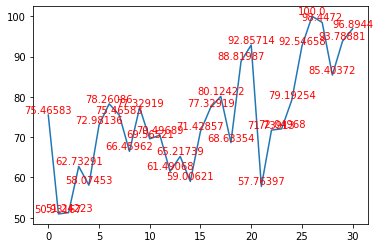

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '트위드자켓', 'keywords': ['트위드자켓'], 'data': [{'period': '2021-03-01', 'ratio': 79.7619}, {'period': '2021-03-02', 'ratio': 48.21428}, {'period': '2021-03-03', 'ratio': 66.07142}, {'period': '2021-03-04', 'ratio': 60.71428}, {'period': '2021-03-05', 'ratio': 60.11904}, {'period': '2021-03-06', 'ratio': 57.73809}, {'period': '2021-03-07', 'ratio': 64.28571}, {'period': '2021-03-08', 'ratio': 64.28571}, {'period': '2021-03-09', 'ratio': 62.5}, {'period': '2021-03-10', 'ratio': 89.28571}, {'period': '2021-03-11', 'ratio': 85.71428}, {'period': '2021-03-12', 'ratio': 79.7619}, {'period': '2021-03-13', 'ratio': 100}, {'period': '2021-03-14', 'ratio': 73.21428}, {'period': '2021-03-15', 'ratio': 66.66666}, {'period': '2021-03-16', 'ratio': 58.92857}, {'period': '2021-03-17', 'ratio': 70.23809}, {'period': '2021-03-18', 'ratio': 64.88095}, {'period': '2021-03-19', 'ratio': 73.21428}, {'period': '2021-03-

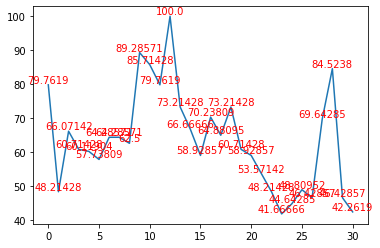

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '써스데이아일랜드원피스', 'keywords': ['써스데이아일랜드원피스'], 'data': [{'period': '2021-03-01', 'ratio': 52.57731}, {'period': '2021-03-02', 'ratio': 69.07216}, {'period': '2021-03-03', 'ratio': 30.92783}, {'period': '2021-03-04', 'ratio': 40.20618}, {'period': '2021-03-05', 'ratio': 29.8969}, {'period': '2021-03-06', 'ratio': 39.17525}, {'period': '2021-03-07', 'ratio': 78.35051}, {'period': '2021-03-08', 'ratio': 25.77319}, {'period': '2021-03-09', 'ratio': 23.71134}, {'period': '2021-03-10', 'ratio': 49.48453}, {'period': '2021-03-11', 'ratio': 23.71134}, {'period': '2021-03-12', 'ratio': 21.64948}, {'period': '2021-03-13', 'ratio': 42.26804}, {'period': '2021-03-14', 'ratio': 49.48453}, {'period': '2021-03-15', 'ratio': 31.95876}, {'period': '2021-03-16', 'ratio': 63.91752}, {'period': '2021-03-17', 'ratio': 40.20618}, {'period': '2021-03-18', 'ratio': 53.60824}, {'period': '2021-03-19', 'ratio': 84.53608}

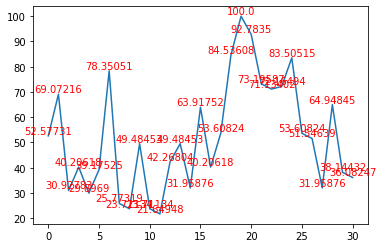

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '쥬시쥬디', 'keywords': ['쥬시쥬디'], 'data': [{'period': '2021-03-01', 'ratio': 32.91139}, {'period': '2021-03-02', 'ratio': 53.16455}, {'period': '2021-03-03', 'ratio': 100}, {'period': '2021-03-04', 'ratio': 54.43037}, {'period': '2021-03-05', 'ratio': 36.70886}, {'period': '2021-03-06', 'ratio': 45.56962}, {'period': '2021-03-07', 'ratio': 55.6962}, {'period': '2021-03-08', 'ratio': 43.03797}, {'period': '2021-03-09', 'ratio': 45.56962}, {'period': '2021-03-10', 'ratio': 51.89873}, {'period': '2021-03-11', 'ratio': 41.77215}, {'period': '2021-03-12', 'ratio': 43.03797}, {'period': '2021-03-13', 'ratio': 60.75949}, {'period': '2021-03-14', 'ratio': 62.02531}, {'period': '2021-03-15', 'ratio': 29.11392}, {'period': '2021-03-16', 'ratio': 39.2405}, {'period': '2021-03-17', 'ratio': 34.17721}, {'period': '2021-03-18', 'ratio': 55.6962}, {'period': '2021-03-19', 'ratio': 56.96202}, {'period': '2021-03

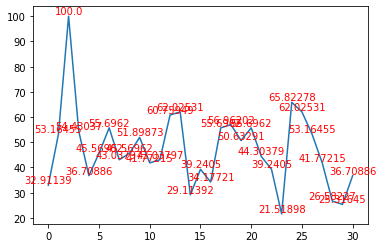

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '블라우스', 'keywords': ['블라우스'], 'data': [{'period': '2021-03-01', 'ratio': 100}, {'period': '2021-03-02', 'ratio': 58.21917}, {'period': '2021-03-03', 'ratio': 44.52054}, {'period': '2021-03-04', 'ratio': 34.9315}, {'period': '2021-03-05', 'ratio': 50.68493}, {'period': '2021-03-06', 'ratio': 43.83561}, {'period': '2021-03-07', 'ratio': 82.19178}, {'period': '2021-03-08', 'ratio': 77.39726}, {'period': '2021-03-09', 'ratio': 60.9589}, {'period': '2021-03-10', 'ratio': 74.65753}, {'period': '2021-03-11', 'ratio': 64.38356}, {'period': '2021-03-12', 'ratio': 47.9452}, {'period': '2021-03-13', 'ratio': 45.20547}, {'period': '2021-03-14', 'ratio': 68.49315}, {'period': '2021-03-15', 'ratio': 53.42465}, {'period': '2021-03-16', 'ratio': 56.84931}, {'period': '2021-03-17', 'ratio': 53.42465}, {'period': '2021-03-18', 'ratio': 51.36986}, {'period': '2021-03-19', 'ratio': 64.38356}, {'period': '2021-03

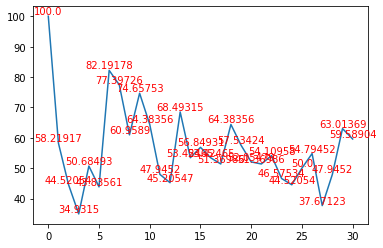

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '올리비아로렌', 'keywords': ['올리비아로렌'], 'data': [{'period': '2021-03-01', 'ratio': 57.60517}, {'period': '2021-03-02', 'ratio': 43.04207}, {'period': '2021-03-03', 'ratio': 45.63106}, {'period': '2021-03-04', 'ratio': 51.77993}, {'period': '2021-03-05', 'ratio': 36.8932}, {'period': '2021-03-06', 'ratio': 63.75404}, {'period': '2021-03-07', 'ratio': 100}, {'period': '2021-03-08', 'ratio': 64.07766}, {'period': '2021-03-09', 'ratio': 53.72168}, {'period': '2021-03-10', 'ratio': 49.51456}, {'period': '2021-03-11', 'ratio': 50.16181}, {'period': '2021-03-12', 'ratio': 80.90614}, {'period': '2021-03-13', 'ratio': 58.57605}, {'period': '2021-03-14', 'ratio': 49.83818}, {'period': '2021-03-15', 'ratio': 60.84142}, {'period': '2021-03-16', 'ratio': 45.95469}, {'period': '2021-03-17', 'ratio': 60.51779}, {'period': '2021-03-18', 'ratio': 62.78317}, {'period': '2021-03-19', 'ratio': 66.99029}, {'period': '2

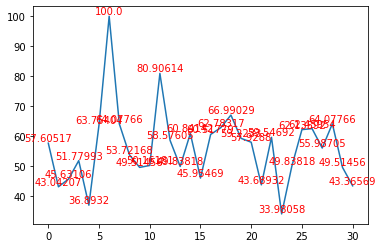

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '여성가디건', 'keywords': ['여성가디건'], 'data': [{'period': '2021-03-01', 'ratio': 91.21621}, {'period': '2021-03-02', 'ratio': 71.62162}, {'period': '2021-03-03', 'ratio': 82.43243}, {'period': '2021-03-04', 'ratio': 71.62162}, {'period': '2021-03-05', 'ratio': 56.75675}, {'period': '2021-03-06', 'ratio': 77.7027}, {'period': '2021-03-07', 'ratio': 79.72972}, {'period': '2021-03-08', 'ratio': 87.16216}, {'period': '2021-03-09', 'ratio': 77.02702}, {'period': '2021-03-10', 'ratio': 81.08108}, {'period': '2021-03-11', 'ratio': 72.29729}, {'period': '2021-03-12', 'ratio': 68.91891}, {'period': '2021-03-13', 'ratio': 77.7027}, {'period': '2021-03-14', 'ratio': 94.59459}, {'period': '2021-03-15', 'ratio': 88.51351}, {'period': '2021-03-16', 'ratio': 81.08108}, {'period': '2021-03-17', 'ratio': 66.21621}, {'period': '2021-03-18', 'ratio': 86.48648}, {'period': '2021-03-19', 'ratio': 66.89189}, {'period': 

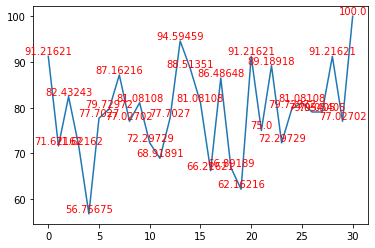

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '발렌시아', 'keywords': ['발렌시아'], 'data': [{'period': '2021-03-01', 'ratio': 55.45851}, {'period': '2021-03-02', 'ratio': 39.30131}, {'period': '2021-03-03', 'ratio': 39.30131}, {'period': '2021-03-04', 'ratio': 24.45414}, {'period': '2021-03-05', 'ratio': 60.69868}, {'period': '2021-03-06', 'ratio': 100}, {'period': '2021-03-07', 'ratio': 27.51091}, {'period': '2021-03-08', 'ratio': 32.31441}, {'period': '2021-03-09', 'ratio': 24.89082}, {'period': '2021-03-10', 'ratio': 27.51091}, {'period': '2021-03-11', 'ratio': 35.37117}, {'period': '2021-03-12', 'ratio': 32.31441}, {'period': '2021-03-13', 'ratio': 67.2489}, {'period': '2021-03-14', 'ratio': 28.82096}, {'period': '2021-03-15', 'ratio': 25.32751}, {'period': '2021-03-16', 'ratio': 15.72052}, {'period': '2021-03-17', 'ratio': 26.63755}, {'period': '2021-03-18', 'ratio': 28.82096}, {'period': '2021-03-19', 'ratio': 22.27074}, {'period': '2021-

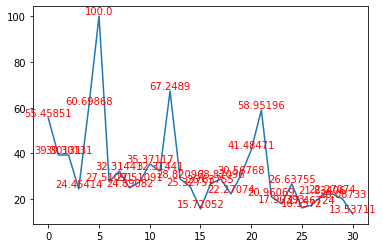

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '모조에스핀', 'keywords': ['모조에스핀'], 'data': [{'period': '2021-03-01', 'ratio': 60.86956}, {'period': '2021-03-02', 'ratio': 89.85507}, {'period': '2021-03-03', 'ratio': 46.37681}, {'period': '2021-03-04', 'ratio': 65.21739}, {'period': '2021-03-05', 'ratio': 59.42028}, {'period': '2021-03-06', 'ratio': 68.11594}, {'period': '2021-03-07', 'ratio': 68.11594}, {'period': '2021-03-08', 'ratio': 55.07246}, {'period': '2021-03-09', 'ratio': 52.17391}, {'period': '2021-03-10', 'ratio': 62.31884}, {'period': '2021-03-11', 'ratio': 60.86956}, {'period': '2021-03-12', 'ratio': 78.26086}, {'period': '2021-03-13', 'ratio': 50.72463}, {'period': '2021-03-14', 'ratio': 65.21739}, {'period': '2021-03-15', 'ratio': 40.57971}, {'period': '2021-03-16', 'ratio': 49.27536}, {'period': '2021-03-17', 'ratio': 56.52173}, {'period': '2021-03-18', 'ratio': 76.81159}, {'period': '2021-03-19', 'ratio': 68.11594}, {'period'

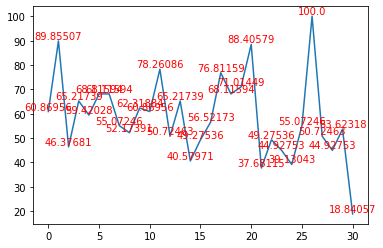

{'startDate': '2021-03-01', 'endDate': '2021-03-31', 'timeUnit': 'date', 'results': [{'title': '여성경량패딩', 'keywords': ['여성경량패딩'], 'data': [{'period': '2021-03-01', 'ratio': 83.05785}, {'period': '2021-03-02', 'ratio': 71.90082}, {'period': '2021-03-03', 'ratio': 84.71074}, {'period': '2021-03-04', 'ratio': 93.80165}, {'period': '2021-03-05', 'ratio': 93.80165}, {'period': '2021-03-06', 'ratio': 75.61983}, {'period': '2021-03-07', 'ratio': 100}, {'period': '2021-03-08', 'ratio': 80.99173}, {'period': '2021-03-09', 'ratio': 83.88429}, {'period': '2021-03-10', 'ratio': 66.1157}, {'period': '2021-03-11', 'ratio': 62.39669}, {'period': '2021-03-12', 'ratio': 65.28925}, {'period': '2021-03-13', 'ratio': 42.56198}, {'period': '2021-03-14', 'ratio': 52.06611}, {'period': '2021-03-15', 'ratio': 59.91735}, {'period': '2021-03-16', 'ratio': 53.719}, {'period': '2021-03-17', 'ratio': 47.10743}, {'period': '2021-03-18', 'ratio': 49.58677}, {'period': '2021-03-19', 'ratio': 28.51239}, {'period': '202

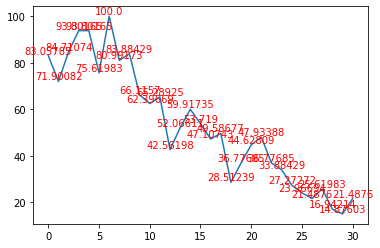

In [26]:
for i in range(1,len(top10_3_1.columns)):
  find_top10_ratio(top10_3_1.columns[i])